# Excercise 5
## Lillian Mueller, Regina Hong 
Evaluating KNN clustering for iris dataset and comparing results to past models 

In [2]:
# model development and evaluation
from sklearn import (
    preprocessing,
    model_selection,
    neighbors,
    metrics
    )

# visualize knn neighbors graph
from sklearn import pipeline, inspection
import matplotlib.pyplot as plt

# other libraries to maipulate dataset
from sklearn.datasets import load_iris
import pandas as pd 

In [3]:
# loading in the iris dataset from sklearn
iris_data = load_iris()

# turning dataset into dataframe format for easier reading
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# adding the target as a class column and renaming numbers to class names
# 0 = setosa, 1 = versicolor, 2 = virginica

df_iris['class'] = iris_data.target.tolist()
df_iris['class'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'},
                inplace=True)

#Create a new column for the target (to be ready for processing)
label_obj = preprocessing.LabelEncoder()
df_iris['class_level'] = label_obj.fit_transform(df_iris['class'])

print("Full Dataset:")
df_iris.sample(4)

Full Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_level
8,4.4,2.9,1.4,0.2,setosa,0
102,7.1,3.0,5.9,2.1,virginica,2
77,6.7,3.0,5.0,1.7,versicolor,1
64,5.6,2.9,3.6,1.3,versicolor,1


In [6]:
# getting features and target for model
predictors, target = iris_data.data, iris_data.target

# Creating Train and Test datasets, .33
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    predictors, 
    target, 
    test_size = 0.33, 
    random_state=0 # ensuring reproducability between splits
)

In [7]:
# defaults of KNeighbors Classifier
# n = 5
# distance metric = 'minkowski'

# for this investigation we will be looking at how the performance of the k-neighbors classifier 
# reacts to using different distance metrics: euclidean. manhattan and cosine

# function to run knn classifier with k and metric, returns model and accuracy scores
def knn_classifier(x_train, x_test, y_train, y_test, k, distance, scaled: bool=False):
    
    if scaled:
        # perform feature scaling (z-scale normalization)
        # needed since are using distance as a metric to find k neighbors 
        scaled = pipeline.Pipeline(
            steps=[
                ("scaler", preprocessing.StandardScaler()), 
                ("knn", neighbors.KNeighborsClassifier(n_neighbors=k, metric=distance))
            ]
        )
        knn_mod = scaled.fit(x_train, y_train)
    
    else: 
        knn_mod = neighbors.KNeighborsClassifier(n_neighbors=k, metric=distance).fit(x_train, y_train)
    
    knn_pred = knn_mod.predict(x_test)
    accuracy = [
        metrics.accuracy_score(y_train, knn_mod.predict(x_train)), 
        metrics.accuracy_score(y_test, knn_pred),
        metrics.r2_score(y_test, knn_pred)
    ]
    return {
        'model':knn_mod, 
        'accuracy':accuracy
    }

In [8]:
# Using the following process to plot the KNN model
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# using sepal and petal length only

def plot_knn(featureNames, k, distance, saveFig: bool=False):
    iris = load_iris(as_frame=True)
    X = iris.data[featureNames]
    y = iris.target
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state=0)
    clf = pipeline.Pipeline(
        steps=[
            ("scaler", preprocessing.StandardScaler()), 
            ("knn", neighbors.KNeighborsClassifier(n_neighbors=k, metric=distance))
        ]
    )

    clf.set_params(knn__weights='distance').fit(X_train, y_train)
    disp = inspection.DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=featureNames[0],
        ylabel=featureNames[1],
        shading="auto",
        alpha=0.5,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"features: {featureNames}\n(k={clf[-1].n_neighbors}, metric={distance!r})"
    )

    plt.show()

    if saveFig:
        plt.savefig(f"{distance}_k{k}.png")

## Modifying Metric, all k=5

k=5, euclidean distance metric
unscaled
[0.97, 0.98, 0.9677211103938025]
scaled
[0.98, 0.96, 0.9354422207876049]


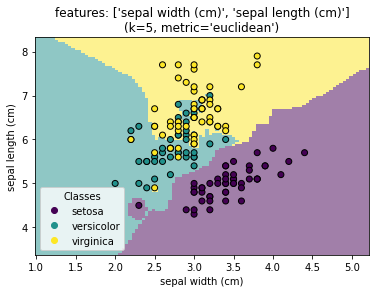

In [9]:
print('k=5, euclidean distance metric')

print('unscaled')
eucl_5_unscaled = knn_classifier(x_train, x_test, y_train, y_test, 5, 'euclidean')
print(eucl_5_unscaled['accuracy'])

print('scaled')
eucl_5 = knn_classifier(x_train, x_test, y_train, y_test, 5, 'euclidean', True)
print(eucl_5['accuracy'])

plot_knn(["sepal width (cm)", "sepal length (cm)"], 5, 'euclidean')

k=5, manhattan distance metric
unscaled
[0.97, 0.98, 0.9677211103938025]
scaled
[0.98, 0.96, 0.9354422207876049]


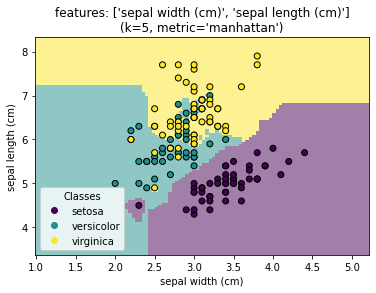

<Figure size 432x288 with 0 Axes>

In [10]:
print('k=5, manhattan distance metric')

print('unscaled')
madhattan_5_unscaled = knn_classifier(x_train, x_test, y_train, y_test, 5, 'manhattan')
print(madhattan_5_unscaled['accuracy'])

print('scaled')
madhattan_5 = knn_classifier(x_train, x_test, y_train, y_test, 5, 'manhattan', True)
print(madhattan_5['accuracy'])

plot_knn(["sepal width (cm)", "sepal length (cm)"], 5, 'manhattan', saveFig=True)

k=5, cosine distance metric
unscaled
[0.98, 0.96, 0.9354422207876049]
scaled
[0.94, 0.82, 0.709489993544222]


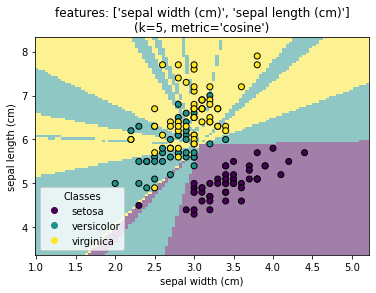

<Figure size 432x288 with 0 Axes>

In [11]:
print('k=5, cosine distance metric')

print('unscaled')
cosine_5_unscaled = knn_classifier(x_train, x_test, y_train, y_test, 5, 'cosine')
print(cosine_5_unscaled['accuracy'])

print('scaled')
cosine_5 = knn_classifier(x_train, x_test, y_train, y_test, 5, 'cosine', True)
print(cosine_5['accuracy'])

plot_knn(["sepal width (cm)", "sepal length (cm)"], 5, 'cosine', saveFig=True)

In [12]:
print('k=5, unscaled')
pd.DataFrame([
    eucl_5_unscaled['accuracy'], 
    madhattan_5_unscaled['accuracy'], 
    cosine_5_unscaled['accuracy']
    ], 
    columns=['Train Data Accuracy', 'Test Data Accuracy', 'r2 Score'], 
    index=['Euclidean', 'Manhattan', 'Cosine']
)

k=5, unscaled


,Train Data Accuracy,Test Data Accuracy,r2 Score
Euclidean,0.97,0.98,0.967721
Manhattan,0.97,0.98,0.967721
Cosine,0.98,0.96,0.935442


In [13]:
print('k=5, scaled')
pd.DataFrame([
    eucl_5['accuracy'], 
    madhattan_5['accuracy'], 
    cosine_5['accuracy']
    ], 
    columns=['Train Data Accuracy', 'Test Data Accuracy', 'r2 Score'], 
    index=['Euclidean', 'Manhattan', 'Cosine']
)

k=5, scaled


,Train Data Accuracy,Test Data Accuracy,r2 Score
Euclidean,0.98,0.96,0.935442
Manhattan,0.98,0.96,0.935442
Cosine,0.94,0.82,0.709490


Euclidean and Manhattan have similar boundaries and similar accuracy scores, if not identical. 

Cosine did not perform well. 

## Modifying k, Metric=Euclidean

k=3, euclidean distance metric
unscaled
[0.97, 0.96, 0.9354422207876049]
scaled
[0.97, 0.96, 0.9354422207876049]


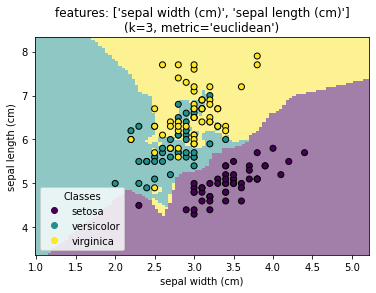

<Figure size 432x288 with 0 Axes>

In [14]:
print('k=3, euclidean distance metric')

print('unscaled')
eucl_3_unscaled = knn_classifier(x_train, x_test, y_train, y_test, 3, 'euclidean')
print(eucl_3_unscaled['accuracy'])

print('scaled')
eucl_3 = knn_classifier(x_train, x_test, y_train, y_test, 3, 'euclidean', True)
print(eucl_3['accuracy'])

plot_knn(["sepal width (cm)", "sepal length (cm)"], 3, 'euclidean', saveFig=True)

k=10, euclidean distance metric
unscaled
[0.98, 0.98, 0.9677211103938025]
scaled
[0.96, 0.96, 0.9354422207876049]


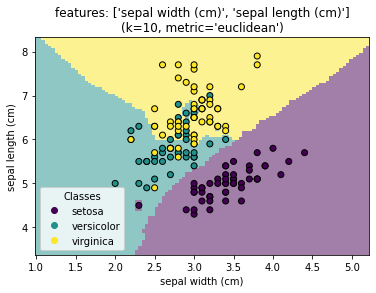

<Figure size 432x288 with 0 Axes>

In [15]:
print('k=10, euclidean distance metric')

print('unscaled')
eucl_10_unscaled = knn_classifier(x_train, x_test, y_train, y_test, 10, 'euclidean')
print(eucl_10_unscaled['accuracy'])

print('scaled')
eucl_10 = knn_classifier(x_train, x_test, y_train, y_test, 10, 'euclidean', True)
print(eucl_10['accuracy'])

plot_knn(["sepal width (cm)", "sepal length (cm)"], 10, 'euclidean', saveFig=True)

In [16]:
print('Euclidean, unscaled')
pd.DataFrame([
    eucl_3_unscaled['accuracy'], 
    eucl_5_unscaled['accuracy'], 
    eucl_10_unscaled['accuracy']
    ], 
    columns=['Train Data Accuracy', 'Test Data Accuracy', 'r2 Score'], 
    index=['k=3', 'k=5', 'k=10']
)

Euclidean, unscaled


,Train Data Accuracy,Test Data Accuracy,r2 Score
k=3,0.97,0.96,0.935442
k=5,0.97,0.98,0.967721
k=10,0.98,0.98,0.967721


In [18]:
print('Euclidean, scaled')
pd.DataFrame([
    eucl_3['accuracy'], 
    eucl_5['accuracy'], 
    eucl_10['accuracy']
    ], 
    columns=['Train Data Accuracy', 'Test Data Accuracy', 'r2 Score'], 
    index=['k=3', 'k=5', 'k=10']
)

Euclidean, scaled


,Train Data Accuracy,Test Data Accuracy,r2 Score
k=3,0.97,0.96,0.935442
k=5,0.98,0.96,0.935442
k=10,0.96,0.96,0.935442


For this dataset, increase k increase accuracy and decreased overfitting to training dataset. 